In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("telco_customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
## Check missing values

In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
## Check outliers

In [7]:
df_num = df.select_dtypes(["int64", "float64"])
col_num = df_num.columns
col_num

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [8]:
for col in col_num:
    print(f"running for (col)")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    print(iqr)
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    print(outliers.shape)

running for (col)
0.0
(1142, 21)
running for (col)
46.0
(0, 21)
running for (col)
54.349999999999994
(0, 21)


In [9]:
for col in col_num:
    print(f"running for (col)")
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    fence_high = q3 + 1.5*iqr
    fence_low = q1 - 1.5*iqr
    outliers = df[(df[col] < fence_low) | (df[col] > fence_high)]
    df = df[(df[col] >= fence_low) & (df[col] <= fence_high)]

running for (col)
running for (col)
running for (col)


In [10]:
df.shape

(5901, 21)

In [11]:
## Check duplicate

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df_clean = df.copy()
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5901 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5901 non-null   object 
 1   gender            5901 non-null   object 
 2   SeniorCitizen     5901 non-null   int64  
 3   Partner           5901 non-null   object 
 4   Dependents        5901 non-null   object 
 5   tenure            5901 non-null   int64  
 6   PhoneService      5901 non-null   object 
 7   MultipleLines     5901 non-null   object 
 8   InternetService   5901 non-null   object 
 9   OnlineSecurity    5901 non-null   object 
 10  OnlineBackup      5901 non-null   object 
 11  DeviceProtection  5901 non-null   object 
 12  TechSupport       5901 non-null   object 
 13  StreamingTV       5901 non-null   object 
 14  StreamingMovies   5901 non-null   object 
 15  Contract          5901 non-null   object 
 16  PaperlessBilling  5901 non-null   object 
 17  

In [15]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df_clean = df_clean[~(df_clean["TotalCharges"] == " ")]
df_clean["TotalCharges"] = df_clean["TotalCharges"].astype("float64")
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5890 non-null   object 
 1   gender            5890 non-null   object 
 2   SeniorCitizen     5890 non-null   int64  
 3   Partner           5890 non-null   object 
 4   Dependents        5890 non-null   object 
 5   tenure            5890 non-null   int64  
 6   PhoneService      5890 non-null   object 
 7   MultipleLines     5890 non-null   object 
 8   InternetService   5890 non-null   object 
 9   OnlineSecurity    5890 non-null   object 
 10  OnlineBackup      5890 non-null   object 
 11  DeviceProtection  5890 non-null   object 
 12  TechSupport       5890 non-null   object 
 13  StreamingTV       5890 non-null   object 
 14  StreamingMovies   5890 non-null   object 
 15  Contract          5890 non-null   object 
 16  PaperlessBilling  5890 non-null   object 
 17  

In [17]:
## Univariate Analysis

In [18]:
df_num = df_clean.select_dtypes(["int64", "float64"])
num_col = df_num.columns
num_col

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [19]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,5890.0,5890.000000,5890.000000,5890.000000
mean,0.0,32.252292,61.885594,2181.089550
std,0.0,24.612263,30.315567,2233.217848
min,0.0,1.000000,18.250000,18.800000
25%,0.0,9.000000,25.600000,365.575000
50%,0.0,28.000000,65.875000,1295.775000
75%,0.0,55.000000,86.787500,3566.362500
max,0.0,72.000000,118.750000,8684.800000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

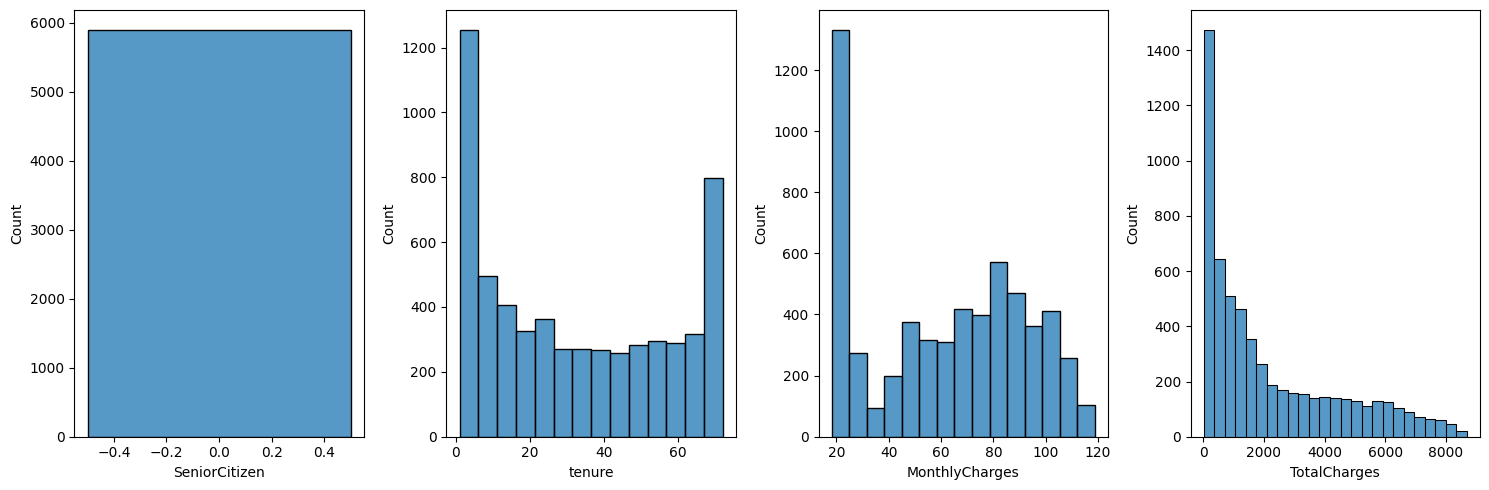

In [21]:
plt.figure(figsize = [15,5])
for i in range(len(num_col)):
    plt.subplot(1,4, i+1)
    sns.histplot(x = num_col[i], data = df_clean)
    plt.tight_layout()

In [22]:
# Multivariate Analysis

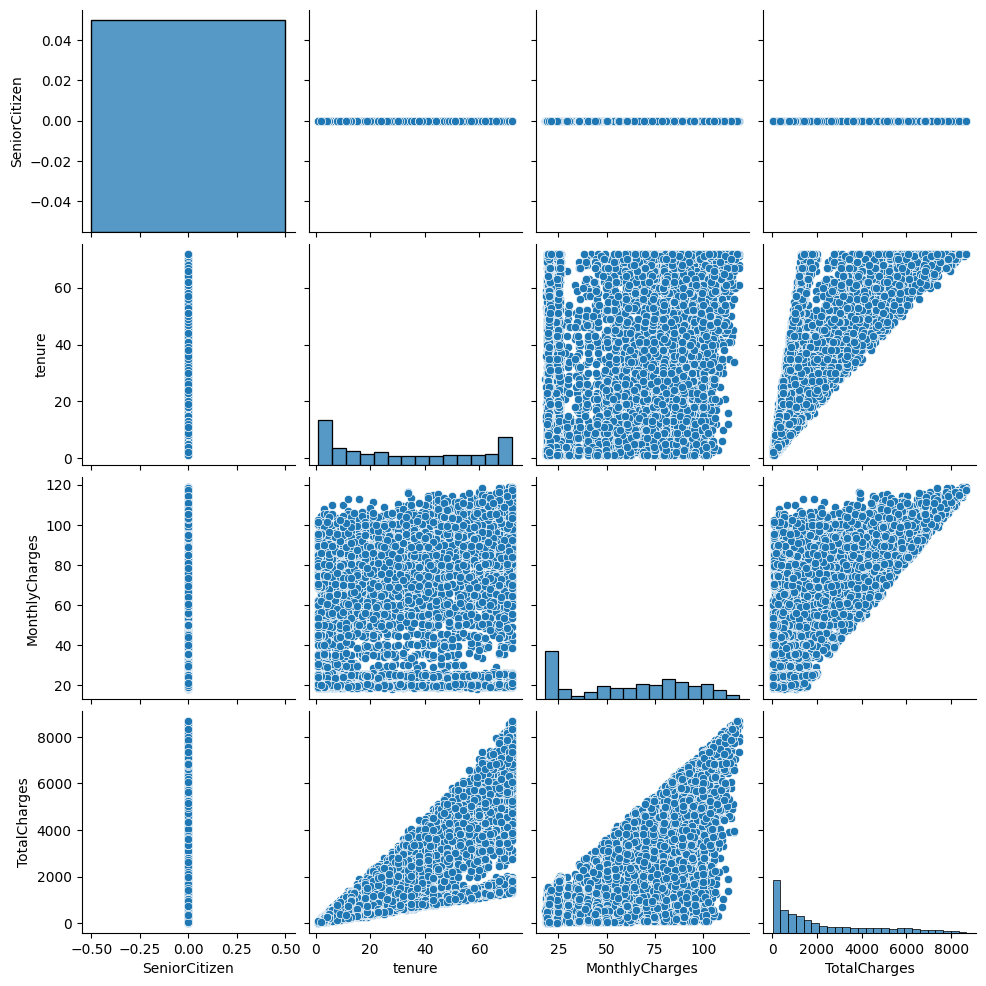

In [23]:
sns.pairplot(df_clean[num_col])

<Axes: >

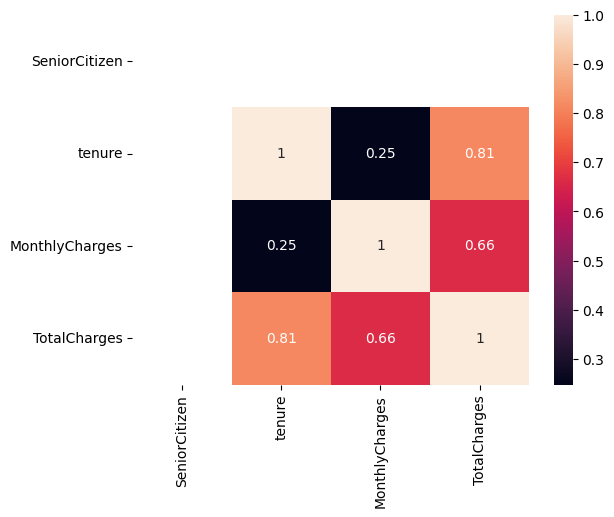

In [24]:
sns.heatmap(df_clean[num_col].corr(), annot = True)

In [25]:
## Feature Engineering

In [26]:
df_clean["TotalCharges_per_tenure"] = df_clean["TotalCharges"] / df_clean["tenure"]
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               5890 non-null   object 
 1   gender                   5890 non-null   object 
 2   SeniorCitizen            5890 non-null   int64  
 3   Partner                  5890 non-null   object 
 4   Dependents               5890 non-null   object 
 5   tenure                   5890 non-null   int64  
 6   PhoneService             5890 non-null   object 
 7   MultipleLines            5890 non-null   object 
 8   InternetService          5890 non-null   object 
 9   OnlineSecurity           5890 non-null   object 
 10  OnlineBackup             5890 non-null   object 
 11  DeviceProtection         5890 non-null   object 
 12  TechSupport              5890 non-null   object 
 13  StreamingTV              5890 non-null   object 
 14  StreamingMovies          5890

In [27]:
## One Not Encoding

In [28]:
df_clean.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,29.850000
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,55.573529
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,54.075000
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,40.905556
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,75.825000


In [29]:
df_clean = df_clean.drop(columns = ["customerID"])

In [30]:
string_df = df_clean.select_dtypes(["object"])
string_col = string_df.columns.tolist()
string_col.remove("Churn")

In [31]:
df_final = pd.get_dummies(df_clean, columns = string_col)

In [32]:
df_final.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,TotalCharges_per_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,No,29.850000,True,False,False,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,No,55.573529,False,True,True,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,Yes,54.075000,False,True,True,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,No,40.905556,False,True,True,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,Yes,75.825000,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [33]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5890 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            5890 non-null   int64  
 1   tenure                                   5890 non-null   int64  
 2   MonthlyCharges                           5890 non-null   float64
 3   TotalCharges                             5890 non-null   float64
 4   Churn                                    5890 non-null   object 
 5   TotalCharges_per_tenure                  5890 non-null   float64
 6   gender_Female                            5890 non-null   bool   
 7   gender_Male                              5890 non-null   bool   
 8   Partner_No                               5890 non-null   bool   
 9   Partner_Yes                              5890 non-null   bool   
 10  Dependents_No                            5890 non-nul

In [34]:
## train test split

In [35]:
X = df_final.drop(columns = ["Churn"])
y = df_final["Churn"].map({"No": 0, "Yes": 1})

In [36]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,TotalCharges_per_tenure,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,29.850000,True,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,55.573529,False,True,True,False,True,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,54.075000,False,True,True,False,True,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,40.905556,False,True,True,False,True,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,75.825000,True,False,True,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,72,21.15,1419.40,19.713889,True,False,True,False,True,...,False,False,False,True,False,True,True,False,False,False
7038,0,24,84.80,1990.50,82.937500,False,True,False,True,False,...,True,False,True,False,False,True,False,False,False,True
7039,0,72,103.20,7362.90,102.262500,True,False,False,True,False,...,True,False,True,False,False,True,False,True,False,False
7040,0,11,29.60,346.45,31.495455,True,False,False,True,False,...,False,True,False,False,False,True,False,False,True,False


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4123, 46)
(1767, 46)
(4123,)
(1767,)


In [39]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
## Hyperparameter Tuning
params = {
    "max_depth" : [2,3,4,5,7,10,15],
    "min_samples_leaf" : [10,15,25,50,100]
}

In [42]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = params,
                           cv = 10,
                           scoring = "roc_auc"
                          )
grid_search.fit(X_train, y_train)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [2, 3, ...], 'min_samples_leaf': [10, 15, ...]}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [43]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,25
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [44]:
from sklearn.metrics import recall_score

y_dtree = dtree.predict(X_test)
y_rf = rf.predict(X_test)
y_rfbest = rf_best.predict(X_test)

In [45]:
print(recall_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(recall_score(y_test, y_rfbest, pos_label = 1, average = "binary"))

0.5214105793450882
0.46851385390428213
0.4105793450881612


In [46]:
from sklearn.metrics import precision_score

print(precision_score(y_test, y_dtree, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rf, pos_label = 1, average = "binary"))
print(precision_score(y_test, y_rfbest, pos_label = 1, average = "binary"))

0.4715261958997722
0.6480836236933798
0.6877637130801688


In [47]:
from sklearn.metrics import roc_auc_score

y_prob_dtree = dtree.predict_proba(X_test)[:,1]
y_prob_rf = rf.predict_proba(X_test)[:,1]
y_prob_rfbest = rf_best.predict_proba(X_test)[:,1]

In [48]:
print(roc_auc_score(y_test, y_prob_dtree))
print(roc_auc_score(y_test, y_prob_rf))
print(roc_auc_score(y_test, y_prob_rfbest))

0.6756844214822851
0.8288026990751807
0.8652806633694312
